In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
#Tensorboard Things

%load_ext tensorboard
import tensorflow as tf
import datetime, os


In [ ]:
#Importing Image Dataset

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title='smear2005.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('smear2005.zip')

In [ ]:
!unzip smear2005.zip

Archive:  smear2005.zip
   creating: smear2005/
   creating: smear2005/herlev/
   creating: smear2005/herlev/carcinoma/
  inflating: smear2005/herlev/carcinoma/149143370-149143378-001.BMP  
  inflating: smear2005/herlev/carcinoma/149143370-149143378-002.BMP  
  inflating: smear2005/herlev/carcinoma/149143370-149143378-003.BMP  
  inflating: smear2005/herlev/carcinoma/149143370-149143388-001.BMP  
  inflating: smear2005/herlev/carcinoma/149143370-149143388-002.BMP  
  inflating: smear2005/herlev/carcinoma/149143370-149143388-003.BMP  
  inflating: smear2005/herlev/carcinoma/149146635-149146651-001.BMP  
  inflating: smear2005/herlev/carcinoma/149146635-149146651-002.BMP  
  inflating: smear2005/herlev/carcinoma/149146635-149146651-003.BMP  
  inflating: smear2005/herlev/carcinoma/149146837-149146854-001.BMP  
  inflating: smear2005/herlev/carcinoma/149146886-149146936-001.BMP  
  inflating: smear2005/herlev/carcinoma/149146886-149146936-002.BMP  
  inflating: smear2005/herlev/carcinoma/

In [ ]:
#For the distribution of the dataset
import os
import numpy as np
import glob
import shutil
class DatasetDivision:
	def __init__(self, root_dir="",output_dir=""):
		self.root_dir = root_dir
		self.output_dir = output_dir
		print("Instance of the class created")
	def printnow(self, new_dir):
		print("Just testing that the method calling is working"+new_dir)
	def divide_dataset(self, root_dir,output_dir):
		self.root_dir =root_dir
		self.output_dir = output_dir
		if os.path.exists(self.output_dir):
			if not os.path.exists(os.path.join(self.output_dir,'train')):
				os.mkdir(os.path.join(self.output_dir,'train')) 
				os.mkdir(os.path.join(self.output_dir,'val')) 
				os.mkdir(os.path.join(self.output_dir,'test')) 
		else:
			os.mkdir(self.output_dir)
			os.mkdir(os.path.join(self.output_dir,'train')) 
			os.mkdir(os.path.join(self.output_dir, 'val')) 
			os.mkdir(os.path.join(self.output_dir, 'test'))
		# Split train/val/test sets
		for file in os.listdir(root_dir):            
			classes_path = os.path.join(root_dir, file)  
			class_files = [name for name in glob.glob(os.path.join(classes_path,'*.bmp'))] 
			train_and_valid, test = train_test_split(class_files, test_size=0.20, random_state=42)
			train, val = train_test_split(train_and_valid, test_size=0.25, random_state=42)

			#creating the training, validation and testing directories where the data will be moved.
			train_dir = os.path.join(self.output_dir, 'train',file) #creates the train data path for Divided_Dataset 
			val_dir = os.path.join(self.output_dir, 'val', file) #creates the validation data path for Divided_Dataset 
			test_dir = os.path.join(self.output_dir, 'test',file) #creates the test data path for Divided_Dataset 
			if not os.path.exists(train_dir):
				os.mkdir(train_dir)
			if not os.path.exists(val_dir):
				os.mkdir(val_dir)
			if not os.path.exists(test_dir):
				os.mkdir(test_dir)

			for frame_folders in train:
				#get only the last directory of the path frame_folders
				frame_folder = os.path.join(root_dir,file,frame_folders)
				shutil.move(frame_folder,train_dir)
			for frame_folders in val:
				frame_folder = os.path.join(root_dir,file,frame_folders)
				shutil.move(frame_folder,val_dir)
			for frame_folders in test:
				frame_folder = os.path.join(root_dir,file,frame_folders)
				shutil.move(frame_folder,test_dir)
			print('Dataset Division finished.')

In [ ]:
path_dir= "/content/smear2005/herlev/"
output_dir = "/content/herle2005Format"
datasetdiv1 = DatasetDivision(path_dir,output_dir)
datasetdiv1.printnow("The new guy")
datasetdiv1.divide_dataset(path_dir, output_dir)

Instance of the class created
Just testing that the method calling is workingThe new guy
Dataset Division finished.
Dataset Division finished.
Dataset Division finished.
Dataset Division finished.
Dataset Division finished.
Dataset Division finished.
Dataset Division finished.


['carcinoma', 'light_dysplastic', 'moderate_dysplastic', 'normal_columnar', 'normal_intermediate', 'normal_superficiel', 'severe_dysplastic']


(7, 7)

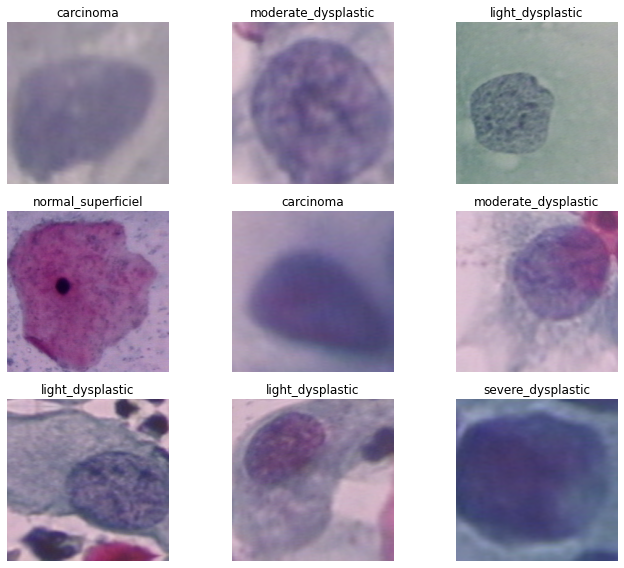

In [ ]:
from fastai.vision import *
batch_size = 10
path_img = output_dir
## Loading data 
data = ImageDataBunch.from_folder(path=path_img, train='train',
            valid='val', ds_tfms=get_transforms(), size = 224, bs=batch_size)#, check_ext=False)
## Normalizing data based on Image net parameters
data.normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(10,8))
print(data.classes)
len(data.classes),data.c

In [ ]:

!pip install python 3.3

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [ ]:
pip install git+https://github.com/aleju/imgaug.git

  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-weii5xdj
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-weii5xdj
  Created wheel for imgaug: filename=imgaug-0.4.0-cp36-none-any.whl size=971107 sha256=182c7ce34d31e9a93ad8e6781991942471014ae982fa13fd4830f5be85fdc903
  Stored in directory: /tmp/pip-ephem-wheel-cache-c_67yfq8/wheels/65/3d/94/ee32cbeaa29c473a4db74c2d21904ac747311fdca4732665f0
Successfully built imgaug
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.4.0 which is incompatible.
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
#Creating a class for data augmentation
import  cv2
import imgaug
import imageio
import os
import numpy as np
from imgaug import augmenters as iaa


class DataAugmentation:


	def __init__(self, root_dir="",output_dir=""):
		self.root_dir = root_dir
		self.output_dir = output_dir
		print("Instance of the DataAugmentation class created")


	def augmentation_of_image(self, test_image, output_path):
		self.test_image = test_image;
		self.output_path = output_path;
		#define the Augmenters



		#properties: A range of values signifies that one of these numbers is randmoly chosen for every augmentation for every batch

		# Apply affine transformations to each image.
		rotate = iaa.Affine(rotate=(-90,90));  
		scale = iaa.Affine(scale={"x": (0.5, 0.9), "y": (0.5,0.9)}); 
		translation = iaa.Affine(translate_percent={"x": (-0.15, 0.15), "y": (-0.15, 0.15)});
		shear = iaa.Affine(shear=(-2, 2)); 
		zoom = iaa.PerspectiveTransform(scale=(0.01, 0.15), keep_size=True) 
		h_flip = iaa.Fliplr(1.0); 
		v_flip = iaa.Flipud(1.0); 
		padding=iaa.KeepSizeByResize(iaa.CropAndPad(percent=(0.05, 0.25)))


		#More augmentations
		blur = iaa.GaussianBlur(sigma=(0, 1.22)) 
		contrast = iaa.contrast.LinearContrast((0.75, 1.5)); 
		contrast_channels = iaa.LinearContrast((0.75, 1.5), per_channel=True) 
		sharpen = iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5));
		gauss_noise = iaa.AdditiveGaussianNoise(scale=0.111*255, per_channel=True) 
		laplace_noise = iaa.AdditiveLaplaceNoise(scale=(0, 0.111*255)) 


		#Brightness 
		brightness = iaa.Multiply((0.35,1.65)) 
		brightness_channels = iaa.Multiply((0.5, 1.5), per_channel=0.75) 

		#CHANNELS (RGB)=(Red,Green,Blue)
		red =iaa.WithChannels(0, iaa.Add((10, 100))) 
		red_rot = iaa.WithChannels(0,iaa.Affine(rotate=(0, 45))) 
		green= iaa.WithChannels(1, iaa.Add((10, 100)))
		green_rot=iaa.WithChannels(1,iaa.Affine(rotate=(0, 45))) 
		blue=iaa.WithChannels(2, iaa.Add((10, 100)))
		blue_rot=iaa.WithChannels(2,iaa.Affine(rotate=(0, 45))) 

		#colors
		channel_shuffle =iaa.ChannelShuffle(1.0); #shuffle all images of the batch
		grayscale = iaa.Grayscale(1.0)
		hue_n_saturation = iaa.MultiplyHueAndSaturation((0.5, 1.5), per_channel=True) #change hue and saturation with this range of values for different values 
		add_hue_saturation = iaa.AddToHueAndSaturation((-50, 50), per_channel=True) #add more hue and saturation to its pixels
		#Quantize colors using k-Means clustering
		kmeans_color = iaa.KMeansColorQuantization(n_colors=(4, 16)) #quantizes to k means 4 to 16 colors (randomly chosen). Quantizes colors up to 16 colors

		#Alpha Blending 
		blend =iaa.AlphaElementwise((0, 1.0), iaa.Grayscale((0,1.0))) ; #blend depending on which value is greater

		#Contrast augmentors
		clahe = iaa.CLAHE(tile_grid_size_px=((3, 21),[0,2,3,4,5,6,7])) #create a clahe contrast augmentor H=(3,21) and W=(0,7)
		histogram = iaa.HistogramEqualization() #performs histogram equalization

		#Augmentation list of metadata augmentors
		OneofRed = iaa.OneOf( [red]);
		OneofGreen = iaa.OneOf( [green] );
		OneofBlue = iaa.OneOf( [blue]);
		contrast_n_shit = iaa.OneOf([contrast, brightness, brightness_channels]);
		SomeAug = iaa.SomeOf(2,[rotate,scale, translation, shear, h_flip,v_flip],random_order=True);
		SomeClahe = iaa.SomeOf(2, [clahe, iaa.CLAHE(clip_limit=(1, 10)),iaa.CLAHE(tile_grid_size_px=(3, 21)),iaa.GammaContrast((0.5, 2.0)), iaa.AllChannelsCLAHE() , iaa.AllChannelsCLAHE(clip_limit=(1, 10), per_channel=True)],random_order=True) #Random selection from clahe augmentors
		edgedetection= iaa.OneOf([iaa.EdgeDetect(alpha=(0, 0.7)),iaa.DirectedEdgeDetect(alpha=(0, 0.7), direction=(0.0, 1.0))]);# Search in some images either for all edges or for directed edges.These edges are then marked in a black and white image and overlayed with the original image using an alpha of 0 to 0.7.
		canny_filter = iaa.OneOf([iaa.Canny(), iaa.Canny(alpha=(0.5, 1.0), sobel_kernel_size=[3, 7])]); #choose one of the 2 canny filter options
		OneofNoise = iaa.OneOf([blur, gauss_noise, laplace_noise])
		Color_1 = iaa.OneOf([channel_shuffle,grayscale, hue_n_saturation , add_hue_saturation, kmeans_color]);
		Color_2 = iaa.OneOf([channel_shuffle,grayscale, hue_n_saturation , add_hue_saturation, kmeans_color]);
		Flip = iaa.OneOf([histogram , v_flip, h_flip]);

		#Define the augmentors used in the Data Augmentation
		Augmentors= [SomeAug, SomeClahe, SomeClahe, edgedetection,sharpen, canny_filter, OneofRed, OneofGreen, OneofBlue, OneofNoise, Color_1, Color_2, Flip, contrast_n_shit]


		for i in range(0,14):
			img = cv2.imread(test_image) 
			images = np.array([img for _ in range(14)], dtype=np.uint8) 
			images_aug = Augmentors[i].augment_images(images)  
			cv2.imwrite(os.path.join(output_path,test_image +"new"+str(i)+'.jpg'), images_aug[i]) 

In [ ]:
import imgaug; print(imgaug.__file__)

/usr/local/lib/python3.6/dist-packages/imgaug/__init__.py


In [ ]:
import shutil

class DataAugmentation_Extension:
	def __init__(self, directory=""):
		self.directory = directory
		print("Instance of DataAugmentation_Extension class created")

	def printnow(self, dir):
		print("Just testing that the method calling is working "+ dir)


	def extend_dataset(self,directory):
		#Create an instance of class 
		print("HEY")
		library_augment= DataAugmentation();
		self.directory = directory 
		if not os.path.exists(self.directory):
			print("ERROR! Couldn't find directory!")
		else:
			print("Directory exists")
		for file in os.listdir(directory):            #for any file inside the root directory 
			classes_path = os.path.join(directory, file)  #So for every folder class we create a class directory
			class_files = [name for name in glob.glob(os.path.join(classes_path,'*.BMP'))]  #alternatively we can use the globe as mentioned
			print(class_files); #call augmentation for all class_files
			for i in range(len(class_files)):
				library_augment.augmentation_of_image(class_files[i], classes_path)

In [ ]:
print(dir(iaa))

['ABCMeta', 'Add', 'AddElementwise', 'AddToBrightness', 'AddToHue', 'AddToHueAndSaturation', 'AddToSaturation', 'AdditiveGaussianNoise', 'AdditiveLaplaceNoise', 'AdditivePoissonNoise', 'Affine', 'AffineCv2', 'AllChannelsCLAHE', 'AllChannelsHistogramEqualization', 'Alpha', 'AlphaElementwise', 'AssertLambda', 'AssertShape', 'Augmenter', 'AverageBlur', 'AveragePooling', 'Batch', 'BilateralBlur', 'BlendAlpha', 'BlendAlphaBoundingBoxes', 'BlendAlphaCheckerboard', 'BlendAlphaElementwise', 'BlendAlphaFrequencyNoise', 'BlendAlphaHorizontalLinearGradient', 'BlendAlphaMask', 'BlendAlphaRegularGrid', 'BlendAlphaSegMapClassIds', 'BlendAlphaSimplexNoise', 'BlendAlphaSomeColors', 'BlendAlphaVerticalLinearGradient', 'BoundingBoxesMaskGen', 'CLAHE', 'CSPACE_ALL', 'CSPACE_BGR', 'CSPACE_CIE', 'CSPACE_GRAY', 'CSPACE_HLS', 'CSPACE_HSV', 'CSPACE_Lab', 'CSPACE_Luv', 'CSPACE_RGB', 'CSPACE_YCrCb', 'CSPACE_YUV', 'Canny', 'Cartoon', 'CenterCropToAspectRatio', 'CenterCropToFixedSize', 'CenterCropToMultiplesOf', 

In [ ]:
print(imgaug.__version__)

0.4.0


In [ ]:
import imgaug
print(imgaug.__file__)

/usr/local/lib/python3.6/dist-packages/imgaug/__init__.py


In [ ]:
print(imgaug.__version__)

0.4.0


In [ ]:
#data augmentation
#directories
target_directory = "/content/herle2005Format/train"
#create an instance of the class
datasetda = DataAugmentation_Extension()
datasetda.extend_dataset(target_directory)

Instance of DataAugmentation_Extension class created
HEY
Instance of the DataAugmentation class created
Directory exists
['/content/herle2005Format/train/moderate_dysplastic/149100064-149100072-001.BMP', '/content/herle2005Format/train/moderate_dysplastic/149101437-149101467-001.BMP', '/content/herle2005Format/train/moderate_dysplastic/153697342-153697375-001.BMP', '/content/herle2005Format/train/moderate_dysplastic/153829700-153829711-001.BMP', '/content/herle2005Format/train/moderate_dysplastic/153698259-153698268-003.BMP', '/content/herle2005Format/train/moderate_dysplastic/149143434-149143442-001.BMP', '/content/herle2005Format/train/moderate_dysplastic/153829745-153829763-001.BMP', '/content/herle2005Format/train/moderate_dysplastic/149102510-149102527-001.BMP', '/content/herle2005Format/train/moderate_dysplastic/149057812-149057847-003.BMP', '/content/herle2005Format/train/moderate_dysplastic/149358108-149358125-001.BMP', '/content/herle2005Format/train/moderate_dysplastic/153697

In [ ]:
### MODELS
import numpy as np
from keras.layers import Dense, GlobalMaxPool2D, BatchNormalization, Dropout
from keras.applications import VGG19
from keras.models import Model, Sequential


"""
Create a new feature extractor based on the pretrained VGG19 model:
The model is frozen from the bottom layer up to 17. 
block5_conv2 is then pooled with GlobalMaxPool2D, and
connected to a Dense layer with 1024 neurons, and then to the softmax layer.
"""
def VGG(seed = None):
    np.random.seed(seed)
    vgg19 = VGG19(weights="imagenet", include_top=False)
    for layer in vgg19.layers[:17]:
        layer.trainable = False
    for layer in vgg19.layers[17:]:
        layer.trainable = True
    y = (vgg19.get_layer("block5_conv2")).output
    mx_y = GlobalMaxPool2D()(y)
    x = BatchNormalization()(mx_y)
    x = Dropout(.5)(x)
    x = Dense(1024, activation='relu', name="dense_1024")(x)
    x = BatchNormalization()(x)
    x = Dropout(.5)(x)
    preds = Dense(7,activation='softmax')(x)
    model = Model(inputs=vgg19.input, outputs=preds)
    return model

In [ ]:
##model_r50.evaluate(test_set_V2, verbose=1)
##model_r50.save("R50_Herlev_7class.h5")

In [ ]:
##from google.colab import files
##files.download("/content/R50_Herlev_7class.h5")

In [ ]:
import numpy as np
from keras.layers import Dense, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



"""LOAD DATA"""
# path to folder with data
path = "/content/herle2005Format/"

train_datagen = ImageDataGenerator(featurewise_center=False,
                                   rotation_range = 5, fill_mode="nearest",
                                   zoom_range=[1/1.0, 1/1.0], width_shift_range=0.0, height_shift_range=0.0, # occasionally out of range
                                   horizontal_flip = True, vertical_flip=True,
                                   brightness_range=[0.5, 1.3], channel_shift_range=20)

no_DA_IDG = ImageDataGenerator()

# in training set: use data augmentation image data generator, for validation and test: no data augmentation.
training_set = train_datagen.flow_from_directory(path+"train/",
                                                target_size=(224, 224), # typical imagenet dimensions
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode='categorical', shuffle=True)



validation_set =  no_DA_IDG.flow_from_directory(path+"val/",
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                shuffle=True)



test_set_V2 = no_DA_IDG.flow_from_directory(path+"test/",
                                                target_size=(224, 224),
                                                color_mode='rgb',
                                                batch_size=1,
                                                class_mode='categorical',
                                                shuffle=False)

###############################################################################################
"""CREATE & TRAIN MODELS"""

model_vgg = VGG()

""" The model was trained with a Adam with a learning rate of 1e-3 for 50 epochs.
Then the training was continued for 50 epochs at a lower learning rate.
The weights loaded at the end of the block result from a good run (based on validation score) following the described
training regime.
"""


epochs = 50
opt = Adam(learning_rate=1e-3)
model_vgg.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])
model_vgg.fit_generator(generator=training_set, epochs=epochs, validation_data=validation_set, verbose=2)

opt = Adam(learning_rate=1e-4)
model_vgg.fit_generator(generator=training_set, epochs=epochs, validation_data=validation_set, verbose=2)

# save model weights
model_vgg.save_weights("K_VGG19_T2.h5")

"""EVALUATE PERFORMANCE ON THE TEST SET"""

y_test = test_set_V2.classes
pred = np.argmax(model_vgg.predict_generator(test_set_V2, steps = test_set_V2.n), axis=1)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


Found 8190 images belonging to 7 classes.
Found 185 images belonging to 7 classes.
Found 186 images belonging to 7 classes.
80142336/80134624 [==============================] - 1s 0us/step
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
256/256 - 139s - loss: 1.8489 - acc: 0.4139 - val_loss: 1.6323 - val_acc: 0.4108
Epoch 2/50
256/256 - 133s - loss: 1.3001 - acc: 0.5250 - val_loss: 1.2729 - val_acc: 0.4703
Epoch 3/50
256/256 - 132s - loss: 1.1254 - acc: 0.5755 - val_loss: 1.0768 - val_acc: 0.5351
Epoch 4/50
256/256 - 133s - loss: 0.9456 - acc: 0.6366 - val_loss: 1.2300 - val_acc: 0.5189
Epoch 5/50
256/256 - 134s - loss: 0.9034 - acc: 0.6491 - val_loss: 1.3390 - val_acc: 0.5351
Epoch 6/50
256/256 - 131s - loss: 0.8718 - acc: 0.6598 - val_loss: 1.4262 - val_acc: 0.4919
Epoch 7/50
256/256 - 133s - loss: 0.7547 - acc: 0.7165 - val_loss: 1.0314 - val_acc: 0.5838
Epoch 8/50
256/256 - 134s - loss: 0.6557 - acc: 0.7521 - val_loss: 1.1951 - val_acc: 0.5946

In [ ]:
model_vgg.save("model_vgg19_herlev.h5")

In [ ]:
from google.colab import files
files.download("/content/model_vgg19_herlev.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>